In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/Downloads/Social_Network_Ads.csv")

In [3]:
df.shape

(400, 5)

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [14]:
df.drop(['User ID'],axis=1,inplace=True)

In [15]:
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [16]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [17]:
df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [18]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

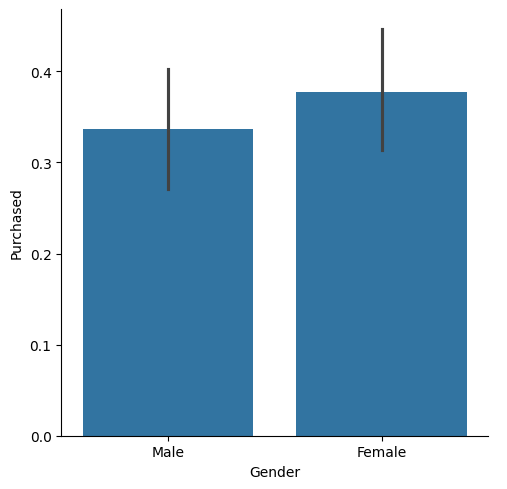

In [20]:
sns.catplot(x="Gender" , y="Purchased" , kind='bar',data=df)

In [21]:
temp = pd.get_dummies(df["Gender"],dtype=int)
temp.head(5) 

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [22]:
df.drop(["Gender"],axis=1,inplace=True)

In [25]:
df = pd.concat([df,temp],axis=1)

                      Age  EstimatedSalary  Purchased    Female      Male
Age              1.000000         0.155238   0.622454  0.073741 -0.073741
EstimatedSalary  0.155238         1.000000   0.362083  0.060435 -0.060435
Purchased        0.622454         0.362083   1.000000  0.042469 -0.042469
Female           0.073741         0.060435   0.042469  1.000000 -1.000000
Male            -0.073741        -0.060435  -0.042469 -1.000000  1.000000 (5, 5)


<Axes: >

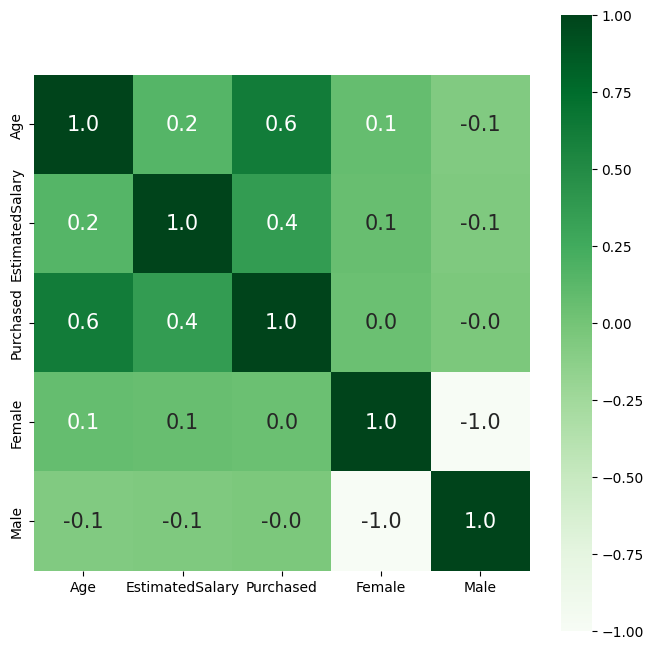

In [28]:
corr = df.corr()
print(corr,corr.shape)
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,annot=True,fmt="1.1f",annot_kws = {'size': 15},cmap="Greens")

In [32]:
X = df.drop(["Male","Female","Purchased"],axis=1)
Y = df["Purchased"]

In [33]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split(X,Y,test_size=0.2,random_state=42)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(320, 2)
(320,)
(80, 2)
(80,)


In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [35]:
print("Training accuracy : " , model.score(xtrain,ytrain)*100)

Training accuracy :  83.75


In [36]:
print("Testing accuracy : " , model.score(xtest,ytest)*100)

Testing accuracy :  88.75


In [38]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

X = df[['Age','EstimatedSalary']]
Xscaled = min_max_scaler.fit_transform(X)

xtrain, xtest , ytrain , ytest = train_test_split(Xscaled , Y , test_size=0.2,random_state=42)

In [39]:
print("Training accuracy : " , model.score(xtrain,ytrain)*100)
print("Testing accuracy : " , model.score(xtest,ytest)*100)

Training accuracy :  64.0625
Testing accuracy :  65.0


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
from sklearn.metrics import accuracy_score
ypred = model.predict(xtest)
print("accuracy score = ",accuracy_score(ytest,ypred)*100)

accuracy score =  65.0


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(ytest,ypred)
print(cm)

[[52  0]
 [28  0]]


In [48]:
from sklearn.metrics import precision_recall_fscore_support , classification_report
prf = precision_recall_fscore_support(ytest,ypred)
print('precision:',prf[0])
print('Recall:',prf[1])
print('fscore:',prf[2])
print('support:',prf[3])

precision: [0.65 0.  ]
Recall: [1. 0.]
fscore: [0.78787879 0.        ]
support: [52 28]


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
cr = classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [51]:
print("TP: ", cm[0][0])
print("FP: ", cm[0][1])
print("FN: ", cm[1][0])
print("TN: ", cm[1][1])

TP:  52
FP:  0
FN:  28
TN:  0
